# Teorema de Punto Fijo

## Algoritmo para funciones contractivas (y otras también)

---

Ejercicio sugerido por Vicky en alguna teórica

Algunos ejemplos: https://es.wikipedia.org/wiki/Punto_fijo

---

In [75]:
# Ancho de notebook = toda la pantalla
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [76]:
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import numpy as np
import random
import inspect

Defino función $f$ contractiva, ie.:

>$$\large d(f(x), f(y)) \leq \alpha \ d(x,y)$$
>
> $\alpha \in (0,1)$

También puedo elegir una que NO lo sea y ver qué pasa con el algoritmo, por ejemplo, una función $f$ con **varios** puntos fijos. En este caso, ¿puede el algoritmo converger a DISTINTOS puntos fijos variando el punto de inicio?

Dejo algunos ejemplos comentados.

In [77]:
def f1(x):
    # Convergente 
    y = np.cos(x) 
    
    return y

def f2(x):
    # Convergente en (?, +inf)
    y = np.log(x) + 4 
    
    return y

def f3(x):
    # Convergente lenta
    y = np.sin(x)
    
    return y

def f4(x):
    # No Convergente
    y = np.cos(10*x)
    
    return y

Algunas variables para graficar

In [78]:
# Defino dominio de f1
desde = 0.1
hasta = 10

# Armo grilla de valores en eje x
grid_step = 0.01
xs = np.arange(desde, hasta, grid_step)

print("Primeros valores de grilla de x: {}".format(xs[:5]))

Primeros valores de grilla de x: [0.1  0.11 0.12 0.13 0.14]


Defino función que grafica la $f$ y la evaluación en algún punto 

In [79]:
%matplotlib inline
# cambiar 'inline' por 'notebook' para modo interactivo con zoom (no anda en colab :( )


def graficar(xs, f, x_0=None, show=True):
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    
    # Ejes x e y
    ax.axvline(0, color="lightgray")
    ax.axhline(0, color="lightgray")
    
    # Grilla de fondo
    ax.set_xticks(np.arange(round(min(xs)), max(xs)+1, 1))
    ax.set_yticks(np.arange(round(min(xs)), max(xs)+1, 1))
    ax.grid()
    
    # Ejes con misma escala
    ax.set_aspect('equal', adjustable='box')
    
    # Funcion f
    ax.plot(xs, f(xs), color="blue")
    
    # Funcion y=x
    ax.plot(xs, xs, color="black")
    
    # De pasar un punto de inicio x_0, lo muetro junto con su evaluacion en f(x_0)
    if x_0:
        ax.axvline(x_0, color="orange", ls="dotted")
        ax.axhline(f(x_0), color="orange", ls="dotted")
        ax.plot(x_0, f(x_0), "o", markersize=4, color="black")

    
    # Puedo mostrarlo directamente, o solo devolver el objeto del grafico
    if show:
        plt.show()
        return fig, ax
    else:
        return fig, ax

# $f_1$: Función contractiva

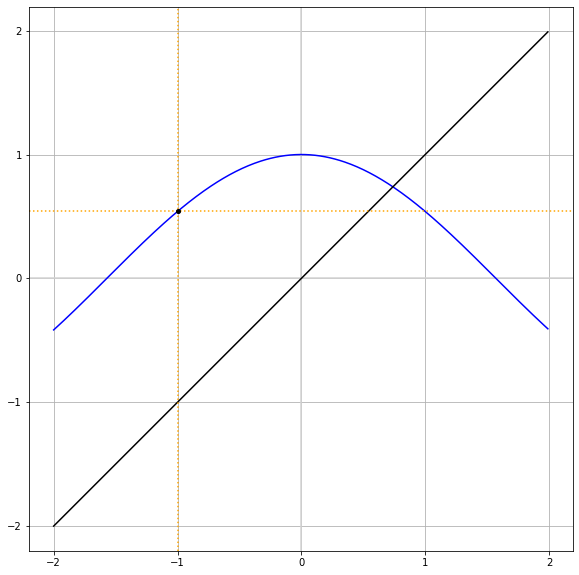

In [80]:
# Defino dominio de f1
desde = -2
hasta = 2

xs = np.arange(desde, hasta, grid_step)

_ = graficar(xs, f1, x_0=-1)

Defino otra función que muestre el camino recorrido por el algoritmo para hallar el punto fijo

In [81]:
%matplotlib inline

def mostrar_recorrido(xs, f, x_0=None, iteraciones=50):
    # Grafico función como antes, y agrego recorrido encima
    fig, ax = graficar(xs, f, show=False)
    
    x = x_0
    
    points = [x]
    
    for i in range(iteraciones):
        x = f(x)
        points.append(x)
        
    # Recorrido
    ax.vlines(points[:-1], [0]+points[1:-1], points[1:], color="red")
    ax.hlines(points[1:], points[:-1], points[1:], color="red")
    
    # Puntos de giro
    ax.plot([points[0]]+points[:-1], [0]+points[1:], "o", markersize=3, color="black")
    
    plt.show()

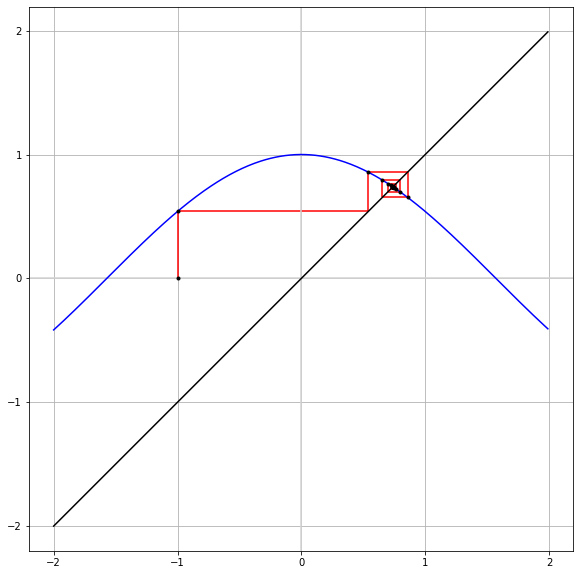

In [82]:
x_0 = -1
mostrar_recorrido(xs, f1, x_0)

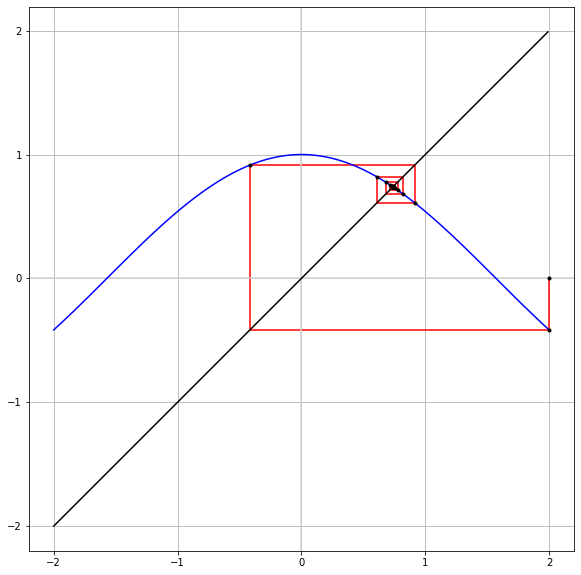

In [83]:
x_0 = 2
mostrar_recorrido(xs, f1, x_0)

# $f_2$: Función contractiva? donde?

In [84]:
print(inspect.getsource(f2))

def f2(x):
    # Convergente en (?, +inf)
    y = np.log(x) + 4 
    
    return y



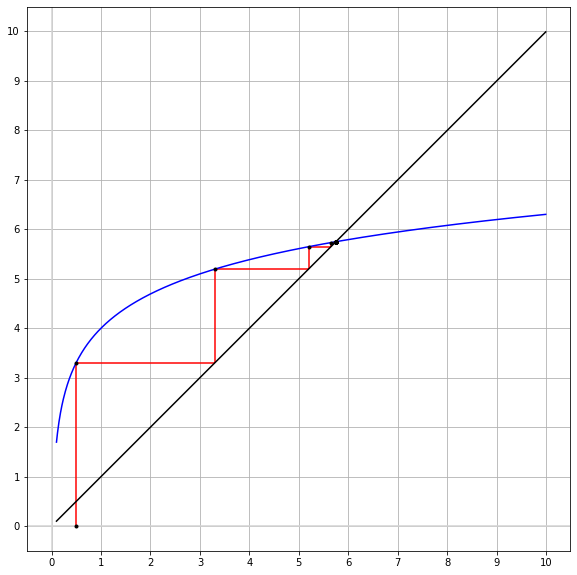

In [85]:
# Defino dominio de f2
desde = 0.1
hasta = 10

xs = np.arange(desde, hasta, grid_step)

x_0 = 0.5
mostrar_recorrido(xs, f2, x_0)

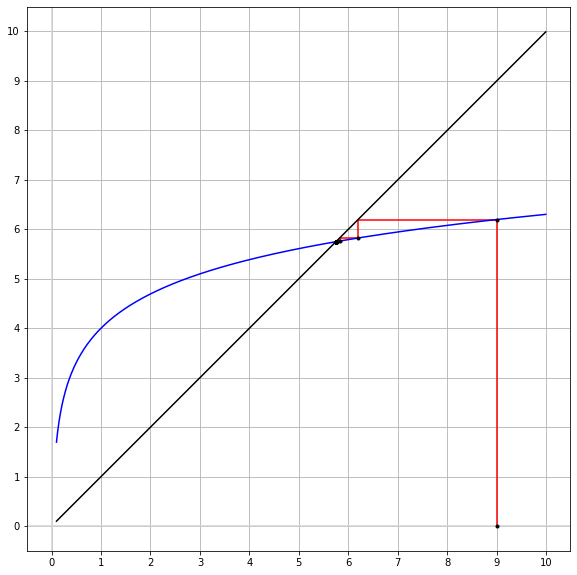

In [86]:
x_0 = 9
mostrar_recorrido(xs, f2, x_0)

Notar: Qué pasa acá?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


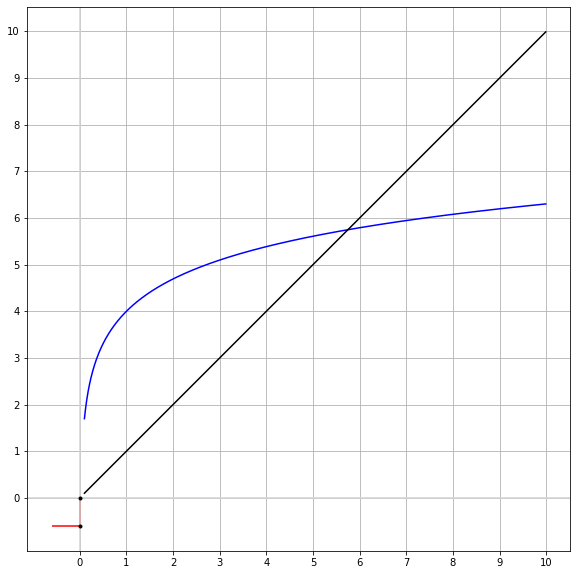

In [87]:
x_0 = 0.01
#x_0 = 0.0186607 <-- probar y variar ligeramente
mostrar_recorrido(xs, f2, x_0)

# $f_3$: Función contractiva, convergencia lenta



Usando la solo la primer función, puedo graficar los pasos por separado, partiendo de un x_0 aleatorio

In [88]:
# Busco punto fijo en f3
print(inspect.getsource(f3))

def f3(x):
    # Convergente lenta
    y = np.sin(x)
    
    return y



In [89]:
desde = -2
hasta = 2

xs = np.arange(desde, hasta, grid_step)

# Elijo al azar un punto en x en el intervalo
x_0 = random.uniform(desde, hasta)

  x  = -0.94624
f(x) = -0.81122
dif  = 0.13501781999318796


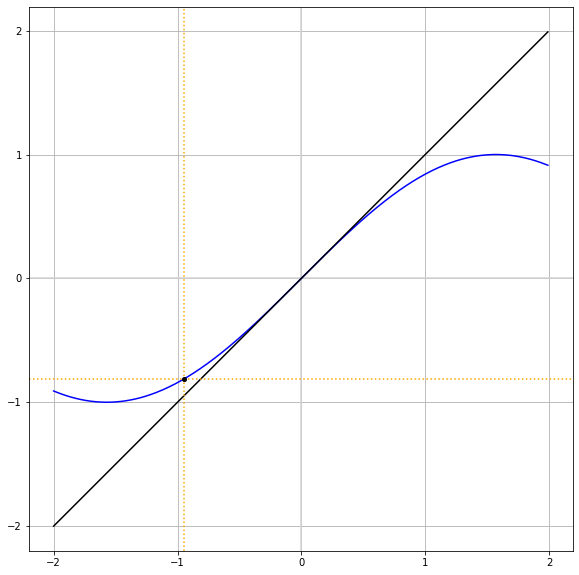

  x  = -0.81122
f(x) = -0.72513
dif  = 0.08609319426582451


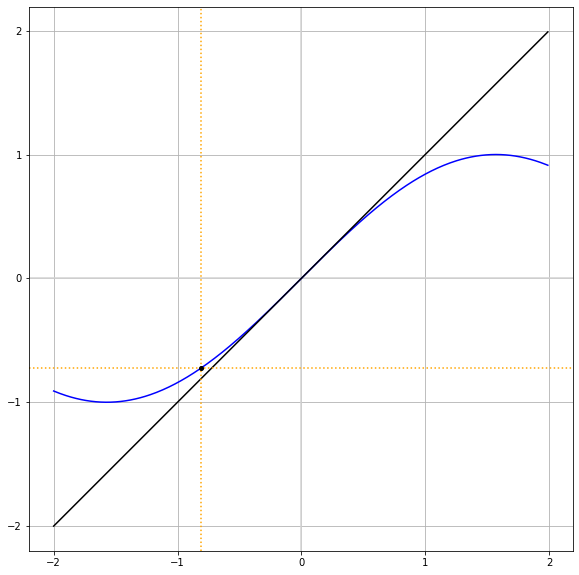

  x  = -0.72513
f(x) = -0.66323
dif  = 0.06189727647616505


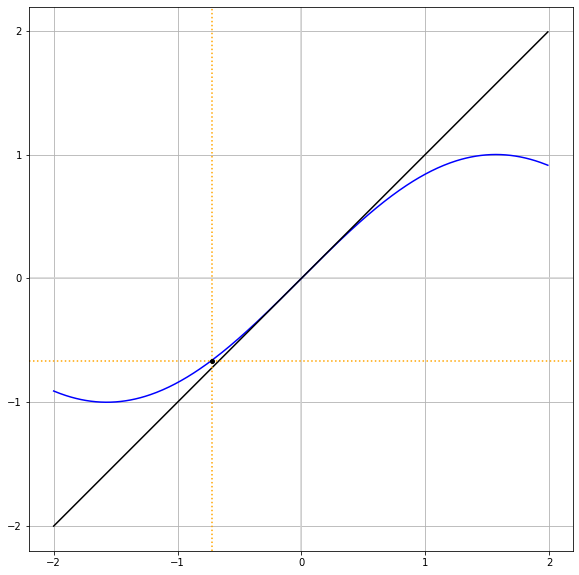

  x  = -0.66323
f(x) = -0.61567
dif  = 0.04756526876999201


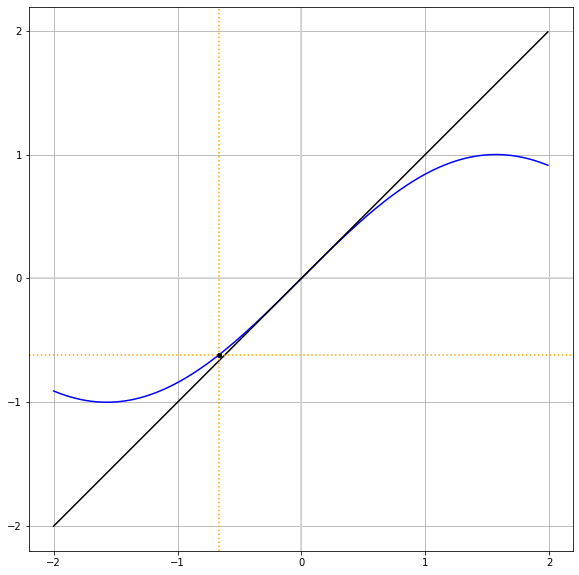

  x  = -0.61567
f(x) = -0.57750
dif  = 0.03816391517811102


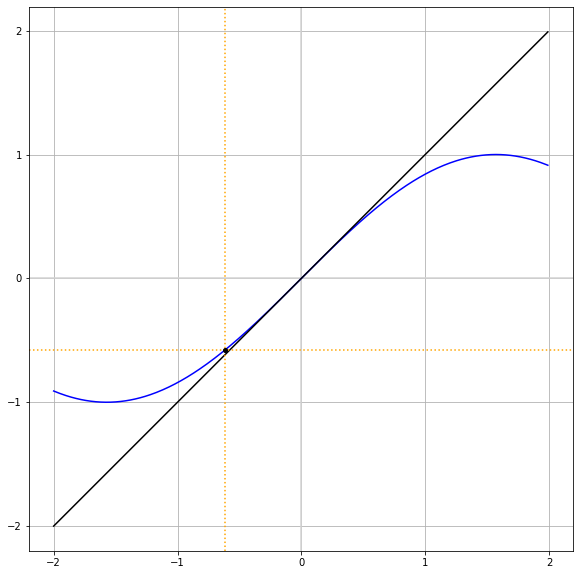

  x  = -0.57750
f(x) = -0.54593
dif  = 0.031569516144249854


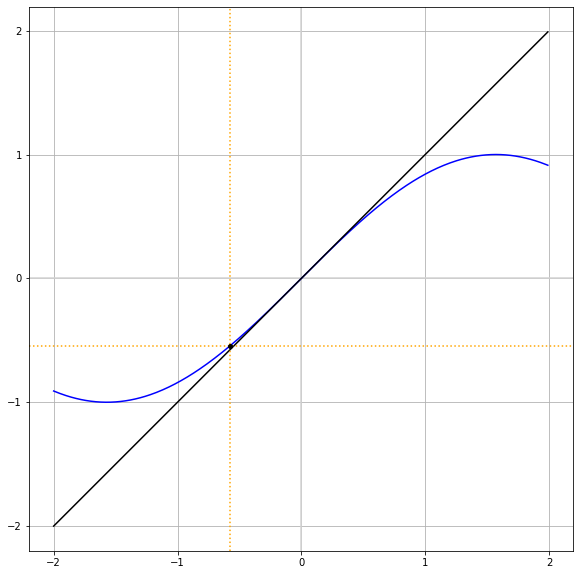

  x  = -0.54593
f(x) = -0.51922
dif  = 0.026717460916338864


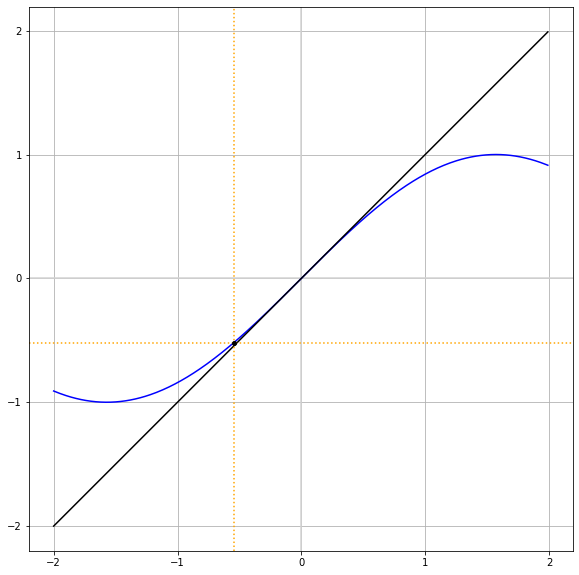

  x  = -0.51922
f(x) = -0.49620
dif  = 0.023016468833859494


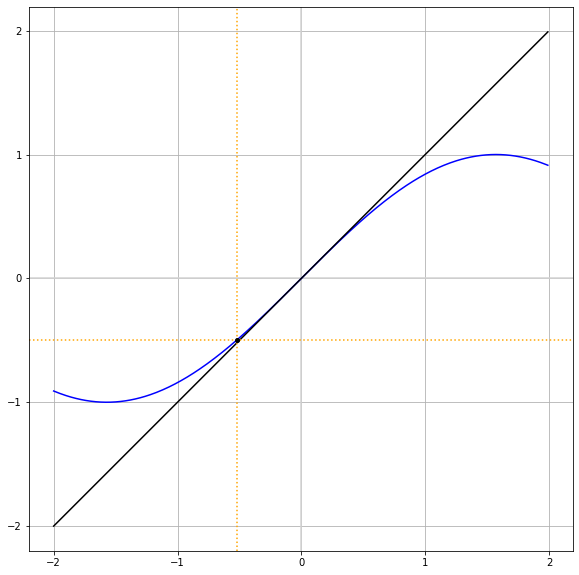

  x  = -0.49620
f(x) = -0.47609
dif  = 0.020112748700947647


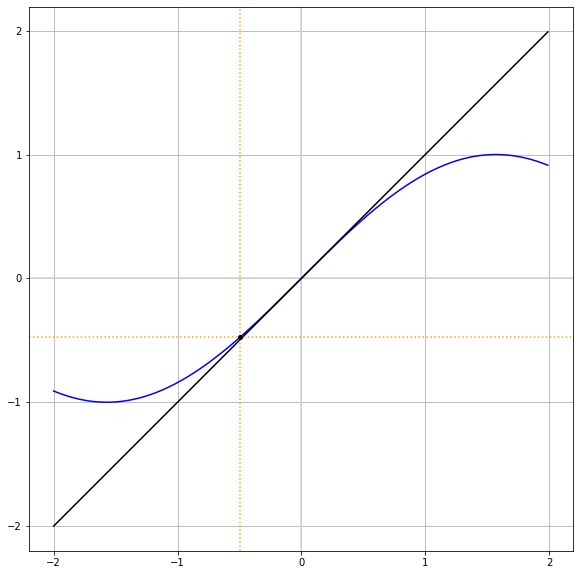

  x  = -0.47609
f(x) = -0.45831
dif  = 0.017782208534843635


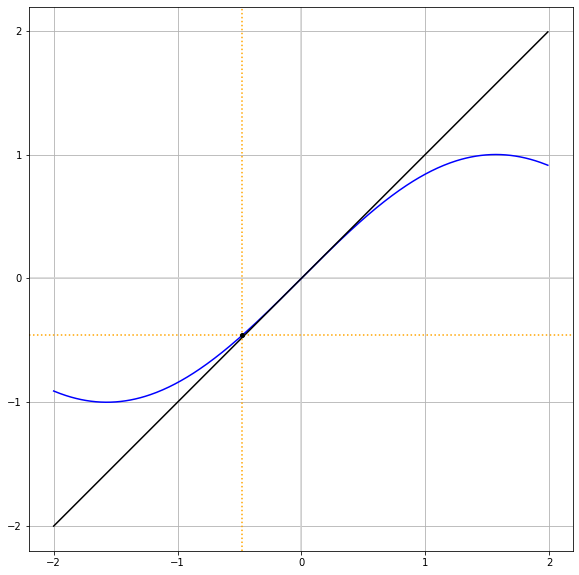

In [90]:
%matplotlib inline 

iteraciones = 10
x = x_0
dists = []
for i in range(iteraciones):
    x = f3(x)
    print("  x  = {:.5f}".format(x))
    print("f(x) = {:.5f}".format(f3(x)) )
    
    dists.append( abs(x - f3(x)) )
    print("dif  = {}".format(dists[-1]))
    fig, ax = graficar(xs, f3, x)
    
plt.close()

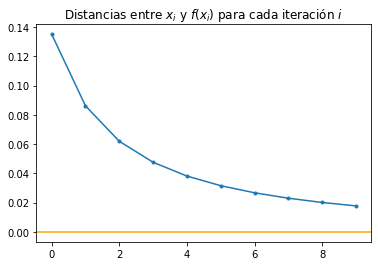

In [91]:
%matplotlib inline

plt.plot(dists, marker='.')
plt.axhline(0, color="orange")
plt.title(r'Distancias entre $x_i$ y $f(x_i)$ para cada iteración $i$')
plt.show()

# $f_4$: Función con varios puntos fijos

In [92]:
# Busco punto fijo en f4
print(inspect.getsource(f4))

def f4(x):
    # No Convergente
    y = np.cos(10*x)
    
    return y



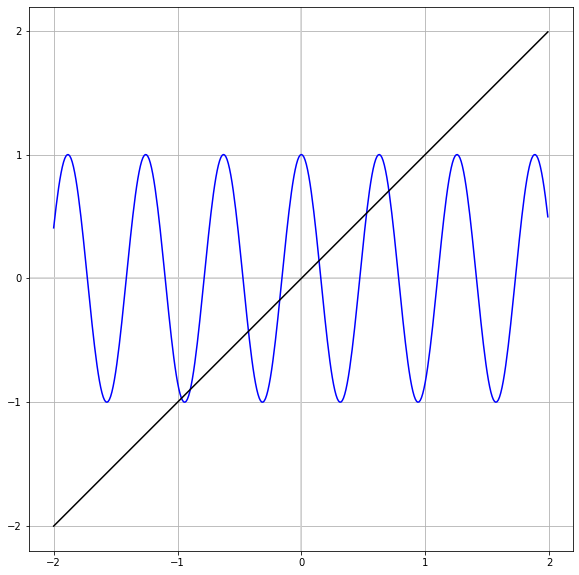

In [93]:
# Defino dominio de f4
desde = -2
hasta = 2

xs = np.arange(desde, hasta, grid_step)

_ = graficar(xs, f4)

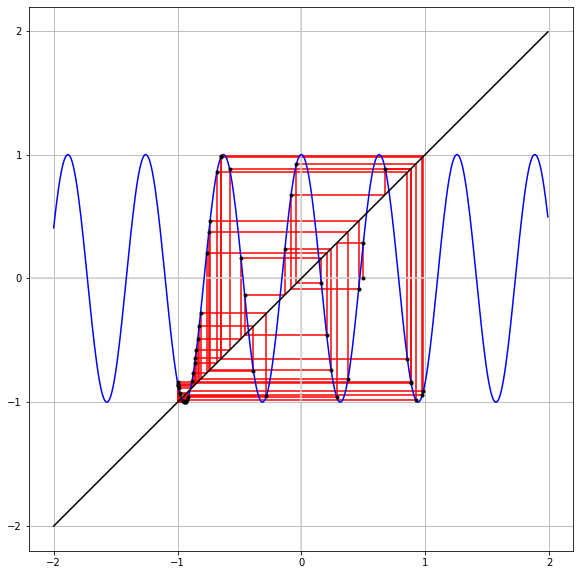

In [94]:
%matplotlib inline

x_0 = 0.5
mostrar_recorrido(xs, f4, x_0)

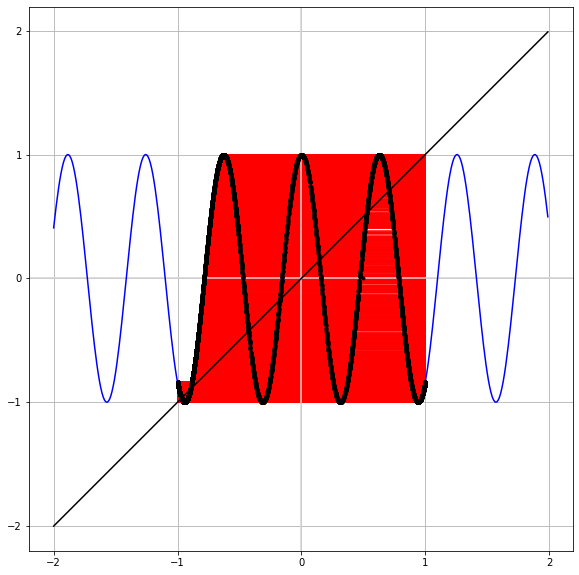

In [95]:
x_0 = 0.5
mostrar_recorrido(xs, f4, x_0, iteraciones=10000)